In [11]:
from DemandInertiaGame import ModelGameEnvironment
import torch
from ActorCritic import ActorCritic, Actor, Critic
import pandas as pd

In [12]:
game = ModelGameEnvironment(2, 400, (57,71) , 10)

In [29]:
game.reset()[0]    


tensor([  0.,   0., 200., 200.])

In [30]:
print(game.step(torch.Tensor([20,10]) ))
print(f"quantity history {game.demand_potential}")
print(f"profit history {game.profit}")

(tensor([ 20.,  10., 200., 200.]), tensor([ -6660., -11590.]), False)
quantity history tensor([[200., 195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [200., 205.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])
profit history tensor([[ -6660.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.],
        [-11590.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.]])


In [49]:
##################################
# Independent Learning Algorithm #
##################################

env = ModelGameEnvironment(2, 400, (57,71) , 25)

# Initialize actor and critic
input_dim = 4


# Initialize actor-critic algorithm
agent1 = ActorCritic(Actor(input_dim), 
                    Critic(input_dim), .95)


agent2 = ActorCritic(Actor(input_dim), 
                    Critic(input_dim), .95)

reward_memory = dict()

# Training loop
num_episodes = 1000
for episode in range(num_episodes):
    total_reward_agent1 = 0
    total_reward_agent2 = 0
    state, _, done = env.reset()

    
    while not done:
        action_profile = torch.Tensor(2)
        log_probs = []


        
        action1, log_prob1 = agent1.sample_action(state)
        action_profile[0] = action1


        action2, log_prob2 = agent2.sample_action(state)
        action_profile[1] = action2
        log_probs.append([log_prob1,log_prob2])        
        
        # Compute reward based on the action profile
        next_state, reward_tensor, done = env.step(action_profile)
        #print(f"next state: {next_state}, reward_tensor: {reward_tensor}, done: {done}")
        reward = torch.sum(reward_tensor).item()

        #for i in range(2):
        agent1.update(state,  reward_tensor[0], log_probs[0][0], next_state)
        total_reward_agent1 += reward_tensor[0]
        agent2.update(state,  reward_tensor[1], log_probs[0][1], next_state)        
        total_reward_agent2 += reward_tensor[1]

    if episode % 10 == 0:
        
        #print(f"Episode {episode} complete")
        #print(total_reward_agent1,total_reward_agent2)
        reward_memory[f"{episode}"] = {"agent 1": total_reward_agent1.item(), "agent 2": total_reward_agent2.item()}



ValueError: Expected parameter loc (Tensor of shape ()) of distribution Normal(loc: nan, scale: nan) to satisfy the constraint Real(), but found invalid values:
nan

In [51]:
pd.DataFrame(reward_memory).T

,agent 1,agent 2
0,-5.380340e+08,-4.136386e+07
10,-1.749201e+05,-9.308478e+05
20,-1.797360e+05,-9.358074e+05
30,1.948790e+05,-2.066141e+05
40,2.755083e+05,-4.864068e+05
50,2.757602e+05,-4.887079e+05
60,2.759717e+05,-4.884391e+05
70,2.756476e+05,-4.887661e+05
80,2.758504e+05,-4.885565e+05
90,2.756769e+05,-4.887647e+05


In [52]:
2.768091e+05

276809.1

<Axes: title={'center': 'Accumulated Profits'}>

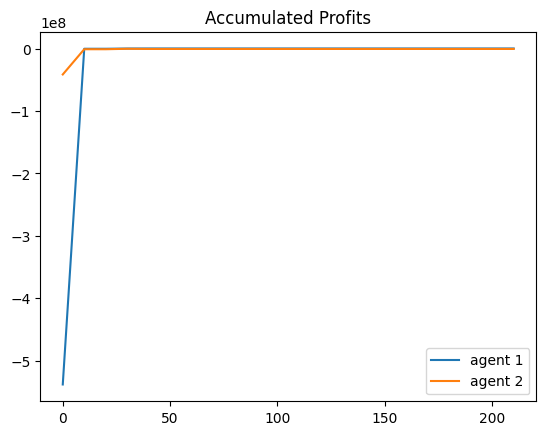

In [50]:
pd.DataFrame(reward_memory).T.plot(title = "Accumulated Profits")


<Axes: title={'center': 'Prices last game'}>

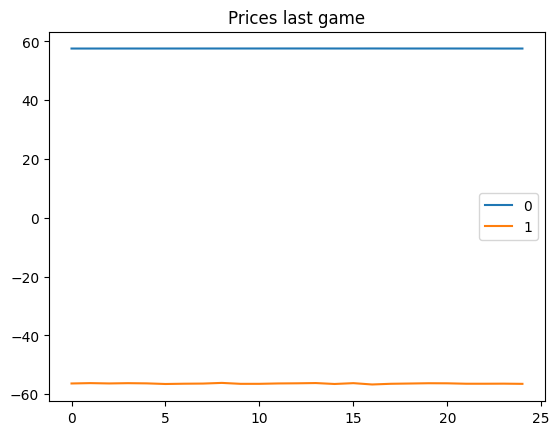

In [41]:
pd.DataFrame(env.prices).T.plot(title = "Prices last game")

<Axes: title={'center': 'Profits last game'}>

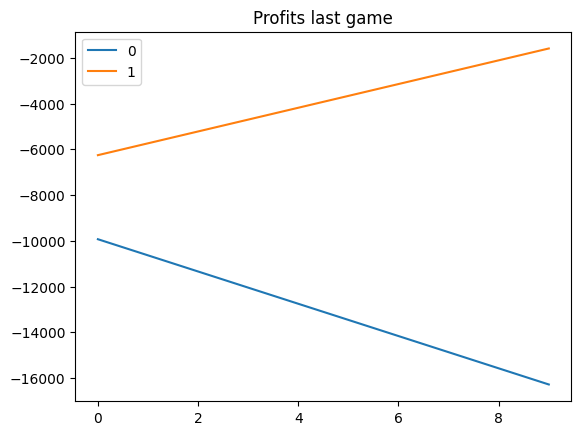

In [8]:
pd.DataFrame(env.profit).T.plot(title = "Profits last game")